# TARUN UDAINIYA  (TASK - 3)

#### From the given ' iris'  dataset, predict the optimum no. of clusters and represent it visually.

In [28]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [16]:
# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
X = iris_df.iloc[:, [0, 1, 2, 3]].values

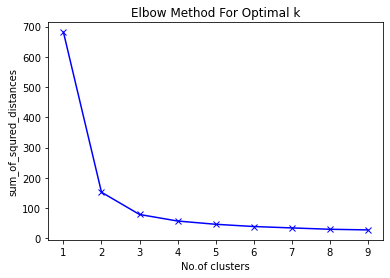

In [18]:
from sklearn.cluster import KMeans
K=range(1,10)
sum_of_squared_distance=[]
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distance.append(km.inertia_)
plt.plot(K,sum_of_squared_distance,'bx-')
plt.xlabel('No.of clusters')
plt.ylabel('sum_of_squred_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

##### We can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster 'sum_of_squred_distances' doesn't decrease significantly with every iteration.

#### From this we choose the number of clusters = 3

In [19]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_classifier = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_predict = kmeans_classifier.fit_predict(X)

In [20]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### Adding labels to the dataset 

In [24]:
iris_df['Labels']=y_predict

In [25]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Labels
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


## Visualizing the clusters 

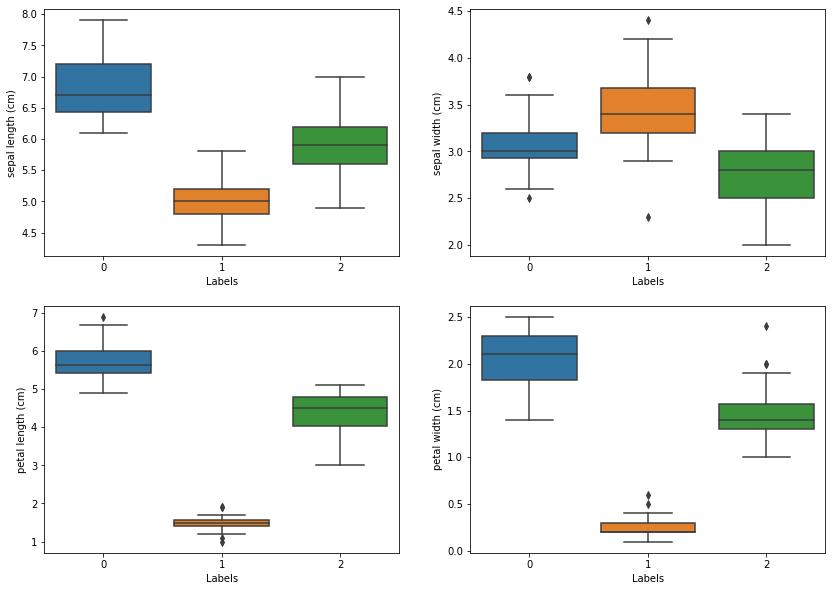

In [30]:
fig=plt.figure(figsize=(14,10))
ax1=fig.add_subplot(2,2,1)
ax1=sns.boxplot(x="Labels",y="sepal length (cm)",data=iris_df)
ax2=fig.add_subplot(2,2,2)
ax2=sns.boxplot(x="Labels",y="sepal width (cm)",data=iris_df)
ax3=fig.add_subplot(2,2,3)
ax3=sns.boxplot(x="Labels",y="petal length (cm)",data=iris_df)
ax4=fig.add_subplot(2,2,4)
ax4=sns.boxplot(x="Labels",y="petal width (cm)",data=iris_df)

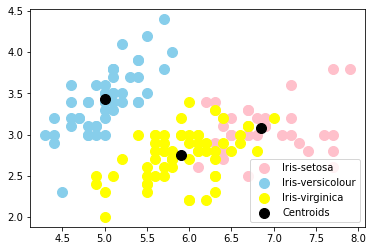

In [34]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], 
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], 
            s = 100, c = 'skyblue', label = 'Iris-versicolour')
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_classifier.cluster_centers_[:, 0], kmeans_classifier.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()